<a href="https://colab.research.google.com/github/anoojtk/python-correlation/blob/main/salarycorr_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data science/Salary.csv')
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [ ]:
df.shape

(35, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


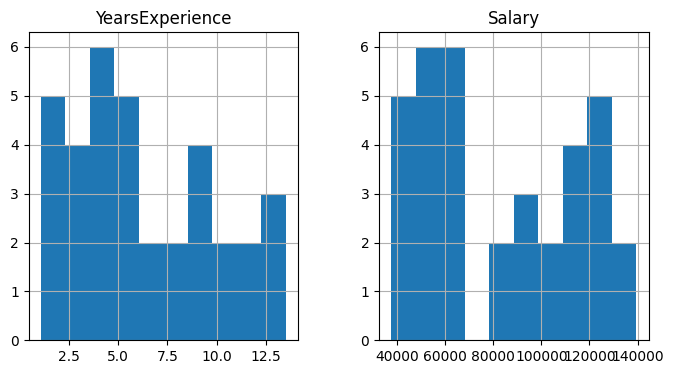

In [ ]:
graph=df.select_dtypes(include=['int32','int64','float'])
graph.hist(figsize=(8,4))
plt.show()

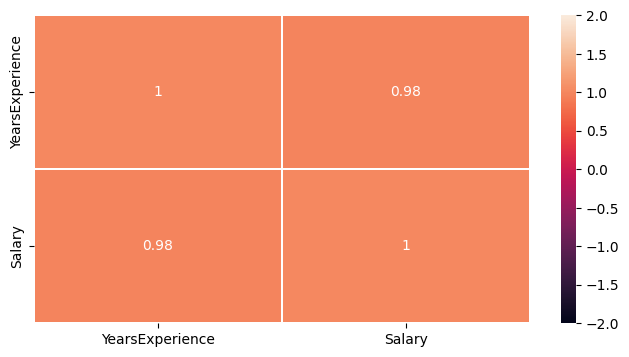

In [ ]:
core=df.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(core,vmin=-2,vmax=2,annot=True,linewidth=0.3)
plt.show()

In [ ]:
y=df['Salary']
x=df.drop(['Salary'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
x_test

,YearsExperience
26,9.5
13,4.1
24,8.7
21,7.1
15,4.9
29,10.5
19,6.0
12,4.0
8,3.2


In [ ]:
y_test

26    116969
13     57081
24    109431
21     98273
15     67938
29    121872
19     93940
12     56957
8      64445
Name: Salary, dtype: int64

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
pickle.dump(lr,open('model.pkl','wb'))

In [ ]:
prediction=model.predict(x_test)
prediction

array([110600.5943416 ,  64141.00472687, 103717.69217645,  89951.88784616,
        71023.90689201, 119204.22204803,  80487.89736909,  63280.64195622,
        56397.73979108])

In [ ]:
print(y_test)

26    116969
13     57081
24    109431
21     98273
15     67938
29    121872
19     93940
12     56957
8      64445
Name: Salary, dtype: int64


In [ ]:
print(prediction)

[110600.5943416   64141.00472687 103717.69217645  89951.88784616
  71023.90689201 119204.22204803  80487.89736909  63280.64195622
  56397.73979108]


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSC is:',mean_squared_error(y_test,prediction))

MSC is: 54958757.92633993


In [ ]:
x=int(input('enter your experience'))
d=pd.Series(x)
d1=pd.DataFrame(d)
pre=model.predict(d1)
print('your salary predictoin is:',pre)

enter your experience120
your salary predictoin is: [1061301.45590235]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
